## TIME SERIES ANALYSIS

### **Introduction**
This is a time series forcast analysis that utilizies the R programming language to analyze historical data, identify trends and patterns and develop models to predict future stock prices.

The focus of this project is to predict the Amazon close stock prices.

### **Methodology**
To begin, we will extract the stock data from yahoo finance using the **quantmod** library in R. Next, we will explore and vizualize the data to identify underling trends and patterns. Then, we will proceed to build an ARIMA model that enables us make future predictions of the stock data. Finally, we will evaluate the models performance and explain any observations.


#### **Importing Required Packages:**
Here are a couple of packages we will be using in our analysis
* **tseries:** The tseries package provides tools for time series analysis,
including various statistical tests and data manipulation functions.
* **forecast:** The forecast package is used for time series forecasting, offering functions for model estimation, prediction, and evaluation.
* **TTR (Technical Trading Rules):** TTR provides technical analysis functions, allowing users to compute various technical indicators commonly used in financial markets.
* **quantmod:** quantmod is a package for financial modeling and quantitative analysis, facilitating tasks such as downloading financial data, modeling, and backtesting trading strategies.

In [1]:
# Install and load necessary libraries
install.packages(c("tseries", "forecast"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’




In [2]:
# Loading the packages
library(tseries)
library(forecast)
library(TTR)
library(quantmod)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




#### **Reading the Dataset**:
As initial mentioned, the focus of this project is to predict the stock price of Amazon data. Here, we want the histroical data from the 17th of April 2021(17-04-2021) to present day.

In [3]:
# loading the dataset
data=getSymbols('AMZN', src='yahoo', from='2021-04-17',auto.assign = FALSE)

# extracting the top rows
head(data);

           AMZN.Open AMZN.High AMZN.Low AMZN.Close AMZN.Volume AMZN.Adjusted
2021-04-19  169.5165  171.7965 168.0080   168.6005    54508000      168.6005
2021-04-20  168.6800  169.1495 165.8000   166.7345    52460000      166.7345
2021-04-21  165.8000  168.1430 165.1905   168.1010    44224000      168.1010
2021-04-22  168.5840  168.6435 165.0725   165.4520    51612000      165.4520
2021-04-23  165.9550  168.7500 165.4250   167.0440    63856000      167.0440
2021-04-26  167.4000  171.4225 166.5470   170.4500    97614000      170.4500

#### **Visualizing the Data:**
Our focus analysis is the close prices, using the plot function in R, we will plot a line chart to vizualize the patterns in the Open prices.

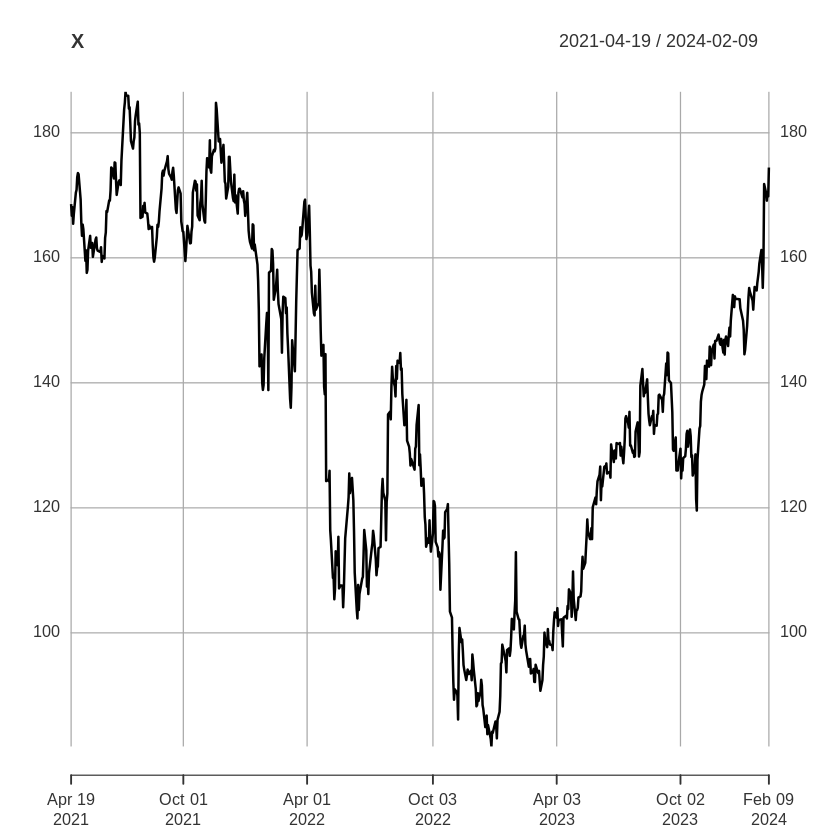

In [4]:
# Isolating the Amazon close prices
X=data$AMZN.Close
plot(X)  # visualizing the data

#### **Making the Data Statutory:**
From the graph above, we can tell that the data is non-stationary.

To enhance the accuracy of ARIMA models, it is crucial to make the data stationary through differencing. In the context of time series analysis and ARIMA models, the parameter ***d*** represents the degree of differencing. Differencing is a technique used to make a time series stationary, which means removing trends or seasonality that may be present in the data.


This is achived using the diff() funtion in R

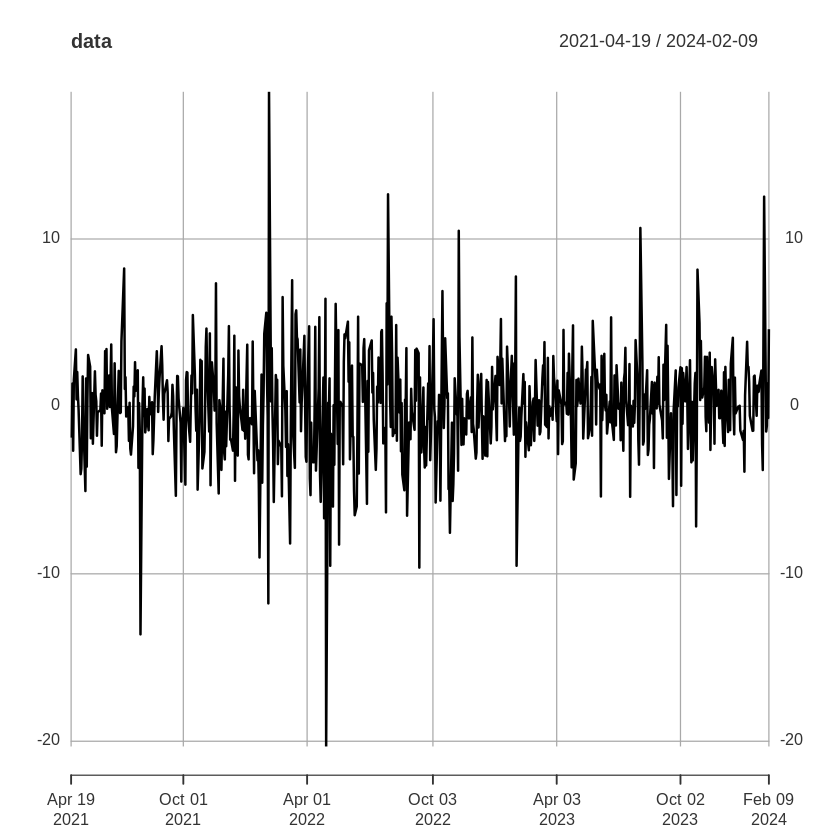

In [5]:
# Making the dataset stationary in mean
data=diff(X)
plot(data)  # time series

We have now successfully made the data stationary mean, and it also looks stationary in variance.

#### **Handling Missing Values**
For a better analysis of our model, it's important we identify and handle missing values.


In [6]:
# Identifying missing values in the dataset
any(is.na(data))

# Removing na/missing values in the dataset
data = na.omit(data)

[1] TRUE

#### **Identify the Order of AR and MA.**
Identifying the orders of AutoRegressive (AR) and Moving Average (MA) components in an ARIMA model is crucial for accurate time series forecasting. The AR component captures the relationship between the current observation and its past values, representing the persistence of historical patterns. On the other hand, the MA component models the influence of past forecast errors on the current observation, capturing short-term fluctuations.

Determining the appropriate orders (p for AR and q for MA) involves analyzing the AutoCorrelation Function (ACF) and Partial AutoCorrelation Function (PACF) plots. The ACF reveals the overall correlation structure, while the PACF helps identify the direct influence of past observations on the current one.

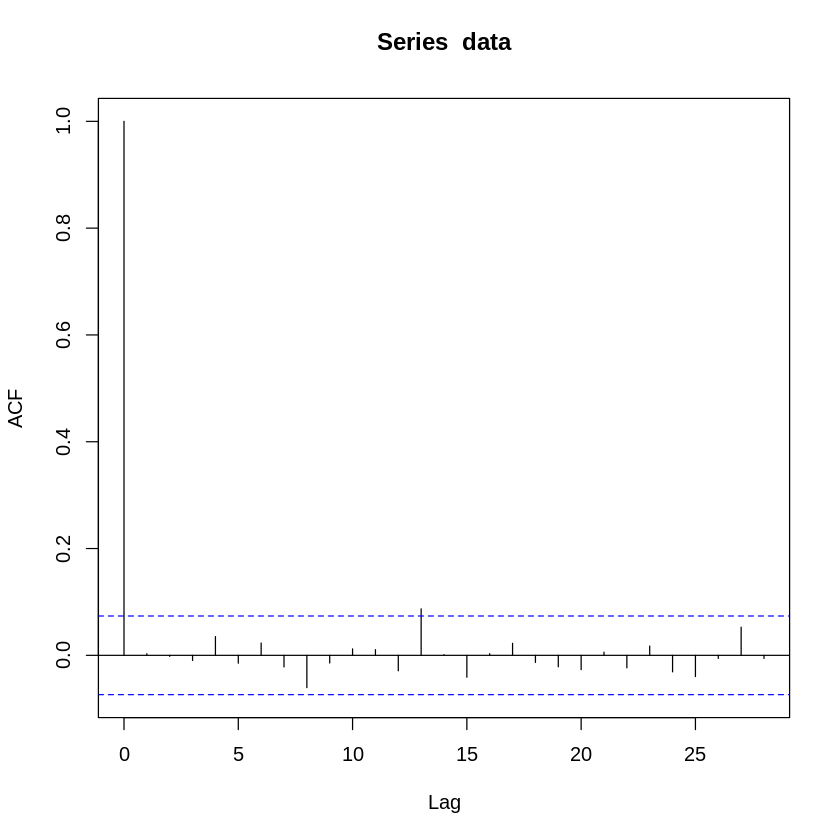

In [7]:
# Identifying the acf
acf(data)

Based on the acf plot, the order of MA is q=1 since only one initial lags is outside of the bounds.

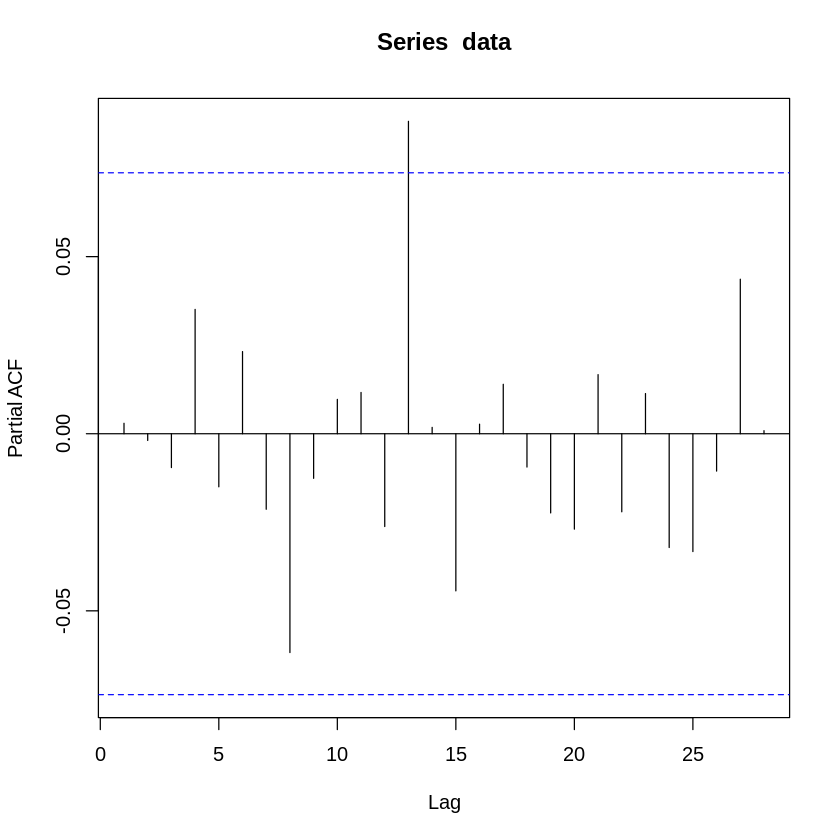

In [8]:
# Identifying the pacf
pacf(data)

Based on the pacf plot, the order of AR is p=0 since no initial lags are outside of the bounds.

#### **Building ARIMA Model**
In this section, we first fit the ARIMA model with our data as well as specify the MA, AR and Differencing Parameters. Here is what a typical ARIMA model structure looks like:

model = arima(Data, order = c(p, d, q)) #where p = 0, q = 1 and d = 1

In [9]:
# Fitting the arima model
model = arima(X, order = c(0,1,1))
model


Call:
arima(x = X, order = c(0, 1, 1))

Coefficients:
         ma1
      0.0030
s.e.  0.0377

sigma^2 estimated as 9.78:  log likelihood = -1811.84,  aic = 3627.67

For comparison purposes we will build other models and measure performances to examine what model us performinf better. In this case, the model with the lowest AIC is the best performing model.

#### **Use auto.arima() to learn the best ARIMA model.**

ALternatively, we can build our model using an auto model function provided by R. The **auto.arima()** function in R, from the forecast package, is used for automatically selecting the best ARIMA model for a given time series dataset.

The auto.arima() function employs an algorithm to explore different combinations of ARIMA parameters, selects the model with the lowest Akaike Information Criterion (AIC), and returns the best-fitted ARIMA model for the given time series data.

Here, we will check for both seasonal and non-seasonal model to see what model provides the best fit for our predictions.

In [11]:
# Learning the best Seasonal ARIMA MODEL
seasonal = auto.arima(X, seasonal=TRUE)
seasonal

Series: X 
ARIMA(0,1,0) 

sigma^2 = 9.78:  log likelihood = -1811.84
AIC=3625.68   AICc=3625.69   BIC=3630.24

In [10]:
# Learning the best non-seasonal ARIMA MODEL
non_seasonal = auto.arima(X, seasonal=FALSE)
non_seasonal

Series: X 
ARIMA(0,1,0) 

sigma^2 = 9.78:  log likelihood = -1811.84
AIC=3625.68   AICc=3625.69   BIC=3630.24

From the forgoing, we can see that both models from the **auto.arima()** function has not performed better than our original model, with an AIC score of 3627.67 as opposed to 3630.24 from the previous model.

Hence, we will predict the closing stock for the next 10 days using the original model.

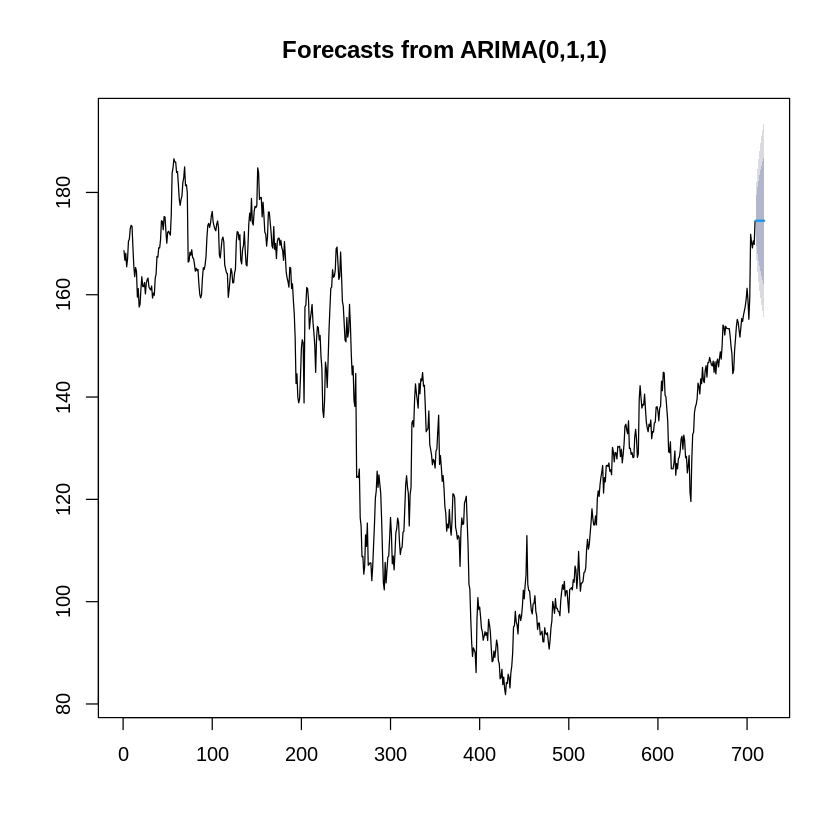

In [12]:
# Making a forcast
model_fcast = forecast(model, h=10) # prediction for 10 step ahead

plot(model_fcast) # visualizing the forcast line.

Finaly, lets see what the actual prediction looks like

In [13]:
# Viewing the actual forcast
model_fcast

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
710       174.4637 170.4560 178.4714 168.3344 180.5930
711       174.4637 168.7875 180.1399 165.7827 183.1447
712       174.4637 167.5084 181.4190 163.8264 185.1010
713       174.4637 166.4304 182.4970 162.1778 186.7496
714       174.4637 165.4808 183.4465 160.7256 188.2018
715       174.4637 164.6225 184.3049 159.4129 189.5145
716       174.4637 163.8333 185.0941 158.2058 190.7215
717       174.4637 163.0987 185.8287 157.0824 191.8450
718       174.4637 162.4088 186.5186 156.0273 192.9001
719       174.4637 161.7563 187.1711 155.0294 193.8980

#### Explanation
* Point Forecast: This represents the central estimate for the value being forecasted. In this case, it's around 174.4637.

* Lo 80 and Hi 80: These are the lower and upper bounds of the forecast interval at an 80% confidence level. For instance, the forecasted value is expected to fall between 170.4560 and 178.4714, with 80% confidence.

* Lo 95 and Hi 95: Similarly, these are the lower and upper bounds of the forecast interval at a 95% confidence level. The forecasted value is expected to fall between 168.3344 and 180.5930, with 95% confidence.

Overall, the model provides a point estimate for the forecasted value along with intervals that indicate the uncertainty associated with the prediction at different confidence levels.